In [29]:
import scipy.stats as scs
import statsmodels.api as sm
import numpy as np
import pandas as pd
from pandas_datareader import data, wb
import matplotlib.pyplot as plt
%matplotlib inline

D:\Users\tom\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [30]:
#DAX = data.DataReader('^GDAXI', data_source='yahoo', start='1/1/2001')
#DAX.info()
symbols = ['^GDAXI','^GSPC','AABA','MSFT']

In [31]:
fin_data = pd.DataFrame()
for sym in symbols:
    fin_data[sym] = data.DataReader(sym, data_source='yahoo', start='1/1/2006')['Adj Close']

In [32]:
fin_data = fin_data.dropna()

In [33]:
fin_data.head()

,^GDAXI,^GSPC,AABA,MSFT
Date,,,,
2006-01-03,5460.680176,1268.800049,40.910000,20.450724
2006-01-04,5523.620117,1273.459961,40.970001,20.549782
2006-01-05,5516.529785,1273.479980,41.529999,20.565020
2006-01-06,5536.319824,1285.449951,43.209999,20.504061
2006-01-09,5537.109863,1290.150024,43.419998,20.465967


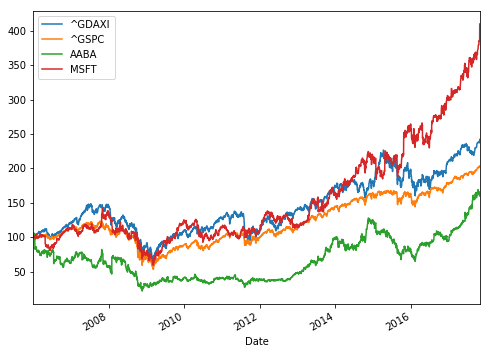

In [34]:
(fin_data/fin_data.iloc[0]*100.).plot(figsize=(8,6))

In [35]:
log_returns = np.log(fin_data/fin_data.shift(1))
log_returns.head()

,^GDAXI,^GSPC,AABA,MSFT
Date,,,,
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,0.011460,0.003666,0.001466,0.004832
2006-01-05,-0.001284,0.000016,0.013576,0.000741
2006-01-06,0.003581,0.009356,0.039656,-0.002969
2006-01-09,0.000143,0.003650,0.004848,-0.001860


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E884278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000FD4D5C0>]], dtype=object)

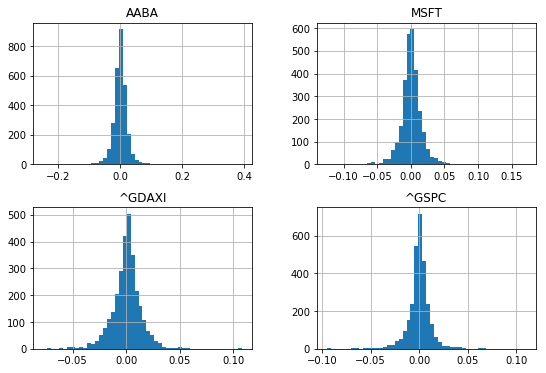

In [36]:
log_returns.hist(bins=50, figsize=(9,6))

In [37]:
def normality_tests(arr):
    print "Skew of data set %14.3f" % scs.skew(arr)
    print "Skew test p-value %14.3f" % scs.skewtest(arr)[1]
    print "Kurt of data set %14.3f" % scs.kurtosis(arr)
    print "Kurt test p-value %14.3f" % scs.kurtosistest(arr)[1]
    print "Norm test p-value %14.3f" % scs.normaltest(arr)[1]

# p-values are all zero (<< 0.05) strongly rejecting the null-hypothesis that the log returns are normally distributed
for sym in symbols:
    print "\nResults for symbol %s" % sym
    print 30 * "-"
    log_data = np.array(log_returns[sym].dropna())
    normality_tests(log_data)


Results for symbol ^GDAXI
------------------------------
Skew of data set         -0.059
Skew test p-value          0.189
Kurt of data set          5.933
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol ^GSPC
------------------------------
Skew of data set         -0.328
Skew test p-value          0.000
Kurt of data set         11.214
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol AABA
------------------------------
Skew of data set          0.512
Skew test p-value          0.000
Kurt of data set         32.283
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol MSFT
------------------------------
Skew of data set          0.071
Skew test p-value          0.117
Kurt of data set         10.463
Kurt test p-value          0.000
Norm test p-value          0.000


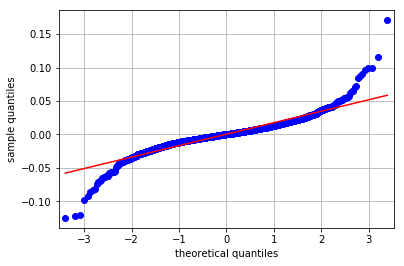

In [39]:
sm.qqplot(log_returns['MSFT'].dropna(), line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')